# Data processing of SCRIBE - Spoken Corpus Recordings In British English

https://www.phon.ucl.ac.uk/resource/scribe/

https://www.phon.ucl.ac.uk/resource/scribe/scribe-manual.htm

SES	Sentence(s) English Sampled	Pressure Microphone signal
PES	Passage English Sampled		Pressure Microphone signal
FES	Free-speech English Sampled	Pressure Microphone signal

SE2	Sentence(s) Eng. 2nd channel	Close talking Microphone signal
PE2	Passage Eng. 2nd channel	Close talking Microphone signal
FE2	Free-speech Eng. 2nd channel	Close talking Microphone signal

SET	Sentence English Text		Text used to prompt the subject
PET	Passage English Text		Text used to prompt the subject

FER	Free-speech Eng. tRanscription	Orthographic transcription as text

SEO	Sentence Eng. Orthography	Orthographic time aligned labels

SEA	Sentence Eng. Acoustic		Acoustic phonetic time aligned labels
PEA	Passage Eng. Acoustic		Acoustic phonetic time aligned labels

SEB	Sentence Eng. Broad		Broad phonetic time aligned labels
PEB	Passage Eng. Broad		Broad phonetic time aligned labels

# Download

In [ ]:
!pip install wget
import wget
url="https://www.phon.ucl.ac.uk/downloads/scribe/scribe_mt_annot_01.zip"
wget.download(url)
!unzip scribe_mt_annot_01.zip

In [ ]:
import pandas as pd
import re
from io import StringIO
import requests

# Read the text file content from the URL
url = 'https://www.phon.ucl.ac.uk/resource/scribe/scribe_mt_annot_01.txt'
response = requests.get(url)
data = response.text
# Extract the relevant lines containing file information
file_lines = re.findall(r'\s+(\d+)\s+(\d+-\d+-\d+)\s+(\d+:\d+)\s+(SCRIBE.*)', data)
# Create a DataFrame from the extracted lines
df = pd.DataFrame(file_lines, columns=['Length', 'Date', 'Time', 'Name'])

# Parse data

In [ ]:
df['Length']=df.Length.astype('float')
df_files=df[df.Length>0]
df_files=df_files.sort_values('Length')
broad_phonetic_files=df_files[df_files.Name.str.endswith('PEB')|df_files.Name.str.endswith('SEB')]

In [ ]:
# Read the text file
# file_path = "SCRIBE/DR1/MT/MAC/ACSB0005.SEB"
def read_broad_phonetic_file(file_path):
  with open(file_path, 'r') as file:
      lines = file.readlines()

  # Filter lines starting with "LBB"
  lbb_lines = [line.strip()[5:] for line in lines if line.startswith('LBB: ')]

  # Create a DataFrame from the filtered lines
  df = pd.DataFrame([line.split(',') for line in lbb_lines], columns=['start', 'empty', 'end', 'label'])

  df=df[['start','end','label']]
  df['start']=df['start'].astype(int)
  df['end']=df['end'].astype(int)
  df['label']=df.label.str[1:]

  return df


In [ ]:
broad_phonetics=broad_phonetic_files.Name.apply(lambda r: read_broad_phonetic_file(r).to_dict(orient="records"))

In [ ]:
broad_phonetic_files['broad_SAMPA_phonetics']=broad_phonetics
broad_phonetic_files['wav_path']=broad_phonetic_files.Name.str[:-1]+'S'
broad_phonetic_files['text_path']=broad_phonetic_files.Name.str[:-1]+'T'
broad_phonetic_files['texts']=broad_phonetic_files.text_path.apply(lambda r: open(r, "r").readlines())
broad_phonetic_files['phoneme_list']=broad_phonetic_files.broad_SAMPA_phonetics.apply(lambda r: pd.DataFrame(r).label.tolist())

<ipython-input-6-00298ad2a0db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broad_phonetic_files['broad_SAMPA_phonetics']=broad_phonetics
<ipython-input-6-00298ad2a0db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broad_phonetic_files['wav_path']=broad_phonetic_files.Name.str[:-1]+'S'
<ipython-input-6-00298ad2a0db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
# test
import soundfile as sf
from IPython.display import Audio
s, fs = sf.read(broad_phonetic_files.iloc[0].wav_path, channels=1, samplerate=20000, format='RAW', subtype='PCM_16')
Audio(data=s, rate=fs)

In [ ]:
broad_phonetic_files.iloc[0].texts

['Serve the coleslaw after I add the oil.  \n',
 'The haunted house was a hit due to outstanding visual effects.  \n',
 "Bob found more clams at the rock-pool's edge.  \n",
 'A large household needs lots of appliances.  \n',
 'The rose trellis smelled sweet.  \n']

In [ ]:
print(broad_phonetic_files.iloc[0].phoneme_list)

['##', 's', '3:', 'v', 'D', '[', 'kc', 'ka', '@U', 'l', 's', 'l', 'O:', 'A:', 'f', 'r', '=r', 'aI', '{', 'dv', 'D', 'i:', 'OI', '@', 'l', '##', 'D', '@', 'h', 'O:', 'n', 'tc', 'ta', 'I', 'dv', 'da', 'h', 'aU', 's', '+', 'w', '@', 'zv', '@', 'h', 'I', 'tc', 'dv', 'da', 'j', '}', 'tc', 'ta', 'u:', 'aU', 'hh', 's', 'tc', 'ta', '{', 'n', 'da', 'I', 'N', 'v', 'I', 'Z', 'l', '@', 'f', 'e', 'kc', 'ka', 's', '##', 'bv', 'ba', 'Q', 'bv', '+', 'f', 'aU', 'n', 'm', 'O:', 'O:', 'kc', 'ka', 'l', '{', 'm', 'zv', '@', 'tc', 'D', '@', 'r', 'Q', 'kc', 'pc', 'pa', 'u:', 'l', 'zv', 'e', 'dZcv', 'dZ', '##', 'eI', 'l', 'A:', 'dZcv', 'dZ', 'h', 'aU', 's', '@U', 'l', 'dv', 'n', 'i:', 'dv', 'da', 'zv', 'l', 'Q', 'tc', 's', '@', 'v', '@', 'pc', 'pa', 'l', 'aI', '@', 'n', 's', '[', 'zv', '##', 'D', '@', 'r', '@U', 'zv', 'tc', 'ta', 'r', 'e', 'l', 'I', 's', '#', 's', '+', 'm', 'e', 'l', 'dv', 'da', '+', 's', '+', 'w', 'i:', 'tc', 'ta', '##']


In [ ]:
import librosa
import soundfile as sf
wavs_20000_Hz=broad_phonetic_files.wav_path.apply(lambda r:sf.read(r, channels=1, samplerate=20000, format='RAW', subtype='PCM_16')[0])
wavs_16000_Hz=wavs_20000_Hz.apply(lambda r: librosa.resample(r,orig_sr=20000,target_sr=16000))

In [ ]:
print(len(wavs_20000_Hz.iloc[0]))
print(len(wavs_16000_Hz.iloc[0]))

600000
480000


# Analyze phonetic content

https://www.phon.ucl.ac.uk/resource/scribe/scribe-manual.htm

Appendix 4: Machine Readable Phonemic Alphabet
CSTR Machine Readable Phonemic Alphabet

Simple Vowels

         Symbol  Use    Symbol  Use	Symbol  Use     Symbol  Use

         i    b_id	@@   b_i_rd	ii  b_e_ad	@    'schwa'
         e    b_ed	o    p_ot       a   b_ad	oo   p_o_rt
         aa   b_a_rd	u    p_ut 	uh  b_ud	uu   b_o_ot
Diphthongs

         Symbol  Use    Symbol  Use     Symbol  Use     Symbol  Use

         ei   d_a_y     oi  b_o_y	ou   g_o	i@   b_e_e_r
         au   c_o_w     e@  b_a_r_e 	u@   t_o_u_r    ai    _e_y_e
Consonants

         Symbol  Use    Symbol  Use     Symbol  Use     Symbol  Use
         p    _pea	v    _van	t    _tea	s    _sea
         k    _key	z    bu_z_z	b    _bee	sh   _s_he
         d    _dye	zh   bei_g_e	g    _guy	ch   ea_c_h
         m    _me	jh   e_d_g_e	n    _k_nee	h    _hat
         ng   si_n_g    y    _yes	th   _t_hin	w    _way
         dh   _t_hen    r    _ray	f    _fan	l    _lay
Syllabic Consonants

	 Symbol  Use
         l=    reduced form of /@ l/	  r=   reduced form of /@ r/
         m=    reduced form of /@ m/ 	  n=   reduced form of /@ n/
         ng=   reduced form of /@ ng/
Diacritics

         Name    		Symbol  Use   _
	 Primary stress		 "  placed before 1ry stressed syllable.
	 Secondary stress   	 '  placed before 2ry stressed syllable.
	 Reduction enforcement   %  placed   before affected  vowel.
	 Reduction   protection  ^  placed before affected vowel.
	 Utterance boundary      /  delimits transcriptions in  text
	 Word boundary   	 #  indicates  inter-word boundaries
	 Syllable boundary       .  indicates  inter-syllable  boundaries
         Morph boundary  	 +  indicates inter-morph boundaries


In [ ]:
separators=set("\" ' % ^ / # ## . +".split(' '))

In [ ]:
phonetic_dfs=broad_phonetic_files.broad_SAMPA_phonetics.apply(lambda r: pd.DataFrame(r))
broad_phonetic_files['broad_SAMPA_phonetics_dfs']=phonetic_dfs
# removing the "=" representing vowel reduction, "%" as well
SAMPA_phone_list=sum(phonetic_dfs.apply(lambda r: r.label.str.strip('=').str.strip('%').tolist()).tolist(),[])
SAMPA_phone_set=set(SAMPA_phone_list)

<ipython-input-13-5ca3545a4408>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broad_phonetic_files['broad_SAMPA_phonetics_dfs']=phonetic_dfs


In [ ]:
phones_series=pd.Series(SAMPA_phone_list).value_counts()
phones_df=pd.DataFrame(phones_series)

In [ ]:
phones_df

0
@    1285
n     953
ta    783
I     780
tc    768
..    ...
U@      1
pcf     1
r<      1
ls      1
@U@     1

[76 rows x 1 columns]

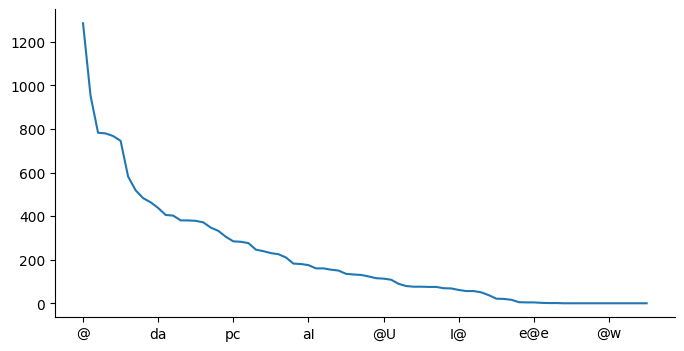

In [ ]:
from matplotlib import pyplot as plt
phones_df[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

Mapping between CMU phonemes and SAMPA (only the 39 CMU phonemes. As SAMPA as more symbols, we need to define SAMPA phones to CMU phonemes for the rest)
https://ufal.mff.cuni.cz/~odusek/courses/npfl123/data/arpabet_to_sampa.html

In [ ]:
url='https://ufal.mff.cuni.cz/~odusek/courses/npfl123/data/arpabet_to_sampa.html'
# Read tables from the webpage
tables = pd.read_html(url)

# Assuming the first table is for vowels and the second one is for consonants
vowels_df = tables[0]
consonants_df = tables[1]

phonemes_df=pd.concat([consonants_df,vowels_df])

In [ ]:
SAMPA_to_CMU={el[1]:el[0] for el in phonemes_df[['CMU/Arpabet','SAMPA']].values}
# SAMPA_to_CMU

} https://en.wikipedia.org/wiki/Close_central_rounded_vowel : the closest CMU would be UW

? https://en.wikipedia.org/wiki/Glottal_stop: the glottal stop as "button" in received pronunciation (RP).

X-SAMPA has allophonic notation (Diacritics) that we have to remove to have broader phonetics for mapping towards CMU phoneme set:
https://en.wikipedia.org/wiki/X-SAMPA

! is a downstep (to be removed for broad SAMPA)

the schwa sound, in SAMPA being [@], is in this dataset appendend to some vowels, we remove it when that happens. E.g. see there: https://www.phon.ucl.ac.uk/resource/scribe/scribe-manual.htm#:~:text=FLEECE%20words%20sometimes%20have%20differentiated%20classes%3A%20%5Bi%3A%5D%20or%20%5B%40i%5D%20vs.%20%5Bi%40%5D%20for%20%22meet%22%20vs.%20%22meat%22.

In [ ]:
SAMPA_to_CMU['}']='UW'
SAMPA_to_CMU['?']='T'
SAMPA_to_CMU['@']='AH'
SAMPA_to_CMU['[']='IH'
SAMPA_to_CMU['O']=SAMPA_to_CMU['Q']

remaining_phones={el for el in SAMPA_phone_set if (el not in SAMPA_to_CMU)}
# print(remaining_phones-separators)

# removing diacritics
for el in remaining_phones-separators:
  if el[:-1] in SAMPA_to_CMU:
    SAMPA_to_CMU[el]=SAMPA_to_CMU[el[:-1]]
  elif el[:-2] in SAMPA_to_CMU:
    SAMPA_to_CMU[el]=SAMPA_to_CMU[el[:-2]]
  else: print('---',el)

In [ ]:
broad_phonetic_files[broad_phonetic_files.phoneme_list.apply(lambda x: '#' in x)].iloc[12].phoneme_list

In [ ]:
# test
import soundfile as sf
from IPython.display import Audio
s, fs = sf.read(broad_phonetic_files[broad_phonetic_files.phoneme_list.apply(lambda x: '[' in x)].iloc[2].wav_path, channels=1, samplerate=20000, format='RAW', subtype='PCM_16')
Audio(data=s, rate=fs)

In [ ]:
len(remaining_phones-separators-set(SAMPA_to_CMU))

0

In [ ]:
for el in separators: SAMPA_to_CMU[el]='sil'

# Convert to CMU phonemes

In [ ]:
CMU_phonetics_dfs=phonetic_dfs.apply(lambda p_df:pd.DataFrame({'start': p_df.start/20000,
                                            'end':p_df.end/20000,
                                            'label': p_df.label.apply(lambda r: SAMPA_to_CMU[r.strip('=').strip('%')])}
                                            )
)

In [ ]:
CMU_phonetics_dfs.iloc[0].T

0       1        2        3       4        5        6       7    \
start     0.0  1.6715  1.82465    2.042  2.1088  2.15415  2.18395    2.24   
end    1.6714  1.8246  2.04195  2.10875  2.1541  2.18385  2.23995  2.3068   
label     sil       S       ER        V      DH       IH        K       K   

           8        9    ...      159       160       161       162       163  \
start  2.30685    2.376  ...  23.8499  23.87195  23.87635  23.90055  24.07455   
end     2.3759  2.44395  ...  23.8719   23.8763   23.9005  24.07445   24.0866   
label       OW        L  ...        D         D       sil         S       sil   

            164      165       166       167       168  
start  24.08665  24.1691  24.30135  24.41805  24.53365  
end    24.16905  24.3013    24.418   24.5336      30.0  
label         W       IY         T         T       sil  

[3 rows x 169 columns]

In [ ]:
# test
import soundfile as sf
from IPython.display import Audio
s, fs = sf.read(broad_phonetic_files.iloc[0].wav_path, channels=1, samplerate=20000, format='RAW', subtype='PCM_16')
Audio(data=s, rate=fs)

In [ ]:
processed_SCRIBE=broad_phonetic_files[['wav_path','texts']]

In [ ]:
processed_SCRIBE['wavs_16000_Hz']=wavs_16000_Hz
processed_SCRIBE['duration']=wavs_16000_Hz.apply(lambda r: len(r)/16000)

<ipython-input-28-14a81481391a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_SCRIBE['wavs_16000_Hz']=wavs_16000_Hz
<ipython-input-28-14a81481391a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_SCRIBE['duration']=wavs_16000_Hz.apply(lambda r: len(r)/16000)


In [ ]:
processed_SCRIBE['n_sentences']=processed_SCRIBE.texts.apply(lambda r: len(r))

<ipython-input-29-b2bbaba1e5e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_SCRIBE['n_sentences']=processed_SCRIBE.texts.apply(lambda r: len(r))


In [ ]:
processed_SCRIBE['CMU_phonetics_dfs']=CMU_phonetics_dfs.apply(lambda r: r.to_dict(orient="records"))

<ipython-input-35-46cef229ea31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_SCRIBE['CMU_phonetics_dfs']=CMU_phonetics_dfs.apply(lambda r: r.to_dict(orient="records"))


In [ ]:
processed_SCRIBE.to_parquet("processed_SCRIBE.parquet")

In [ ]:
test_read=pd.read_parquet('processed_SCRIBE.parquet')
test_read['CMU_phonetics_dfs']=test_read.CMU_phonetics_dfs.apply(lambda r: pd.DataFrame.from_records(r)[['start','end','label']])
test_read['CMU_phonetics_dfs'].iloc[0]

start       end label
0     0.00000   1.67140   sil
1     1.67150   1.82460     S
2     1.82465   2.04195    ER
3     2.04200   2.10875     V
4     2.10880   2.15410    DH
..        ...       ...   ...
164  24.08665  24.16905     W
165  24.16910  24.30130    IY
166  24.30135  24.41800     T
167  24.41805  24.53360     T
168  24.53365  30.00000   sil

[169 rows x 3 columns]

Further reading

TIMIT
https://www.researchgate.net/publication/243787812_TIMIT_Acoustic-phonetic_Continuous_Speech_Corpus

GlobalTIMIT (provides a good summary of TIMIT)
https://languagelog.ldc.upenn.edu/myl/GlobalTIMIT_IS2018_submitted.pdf
(to my understanding the output od this project is not clear, I don't think there is much we can use unfortunately)

Analysis of variability in speech
https://www.researchgate.net/profile/Dani-Byrd/publication/21644047_Preliminary_results_on_speaker-dependent_variation_in_the_TIMIT_database/links/597b8c98458515687be8cd08/Preliminary-results-on-speaker-dependent-variation-in-the-TIMIT-database.pdf